In [50]:
import numpy as np
import matplotlib.pyplot as plt

import os 
import pandas as pd
import pdb

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large', 
         'font.size': 20,
         'lines.linewidth': 4}
pylab.rcParams.update(params)

#Define Computer
import os
Malphigui=0
if Malphigui:
    directory='/home/pdavid/Bureau/Updated_BCs_2/Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Updated_BCs_2/Figures_and_Tests/Multiple_sources'
    csv_directory='/home/pdavid/Bureau/Updated_BCs_2/Figures_and_Tests/Multiple_sources/csv_outputs'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Code/'
    directory_script='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Multiple_sources'
    csv_directory='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Multiple_sources/csv_outputs'
    directory_article_figures='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
os.chdir(directory)

from Testing import extract_COMSOL_data

COMSOL_lin_dir=directory_script + '/COMSOL_output/linear'
COMSOL_metab_dir=directory_script + '/COMSOL_output/metab'

In [51]:
range_cells=np.array(pd.read_csv(csv_directory + '/range_cells.csv'))

In [52]:
range_cells

array([[ 4],
       [ 8],
       [12],
       [16],
       [22]])

In [53]:
df_COMSOL=pd.read_fwf(directory_script + '/COMSOL_output/linear/q.txt').columns.astype(float)



In [54]:
q_FEM_linear,FEM_phi_linear,FEM_x_linear,FEM_y_linear=extract_COMSOL_data(COMSOL_lin_dir, [1,1,0])
q_FEM_metab,FEM_phi_metab,FEM_x_metab,FEM_y_metab=extract_COMSOL_data(COMSOL_metab_dir, [1,1,0])



For a given set of discretization size:

In [55]:
cells=5
Multi_linear_dir=csv_directory + '/linear/cells={}'.format(int(cells))
Multi_metab_dir=csv_directory + '/metab/cells={}'.format(int(cells)) 

phi_Multi_cart_linear=np.squeeze(pd.read_csv(Multi_linear_dir + '/phi_Multi_cart_fine_linear.csv').to_numpy())
phi_Multi_FEM_linear=np.squeeze(pd.read_csv(Multi_linear_dir + '/phi_Multi_FEM_linear.csv').to_numpy())

phi_Multi_cart_metab=np.squeeze(pd.read_csv(Multi_metab_dir + '/phi_Multi_cart_fine_metab.csv').to_numpy())
phi_Multi_FEM_metab=np.squeeze(pd.read_csv(Multi_metab_dir + '/phi_Multi_FEM_metab.csv').to_numpy())

q_Multi_linear=np.squeeze(pd.read_csv(Multi_linear_dir + '/q_Multi_linear.csv').to_numpy())
q_Multi_metab=np.squeeze(pd.read_csv(Multi_metab_dir + '/q_Multi_metab.csv').to_numpy())

    
    

In [56]:
phi_Multi_cart_linear

array([[  2.4       ,   2.4       ,   0.33731473],
       [  7.2       ,   2.4       ,   0.35911681],
       [ 12.        ,   2.4       ,   0.38092735],
       ...,
       [228.        , 237.6       ,   0.37060104],
       [232.8       , 237.6       ,   0.35134908],
       [237.6       , 237.6       ,   0.33217937]])

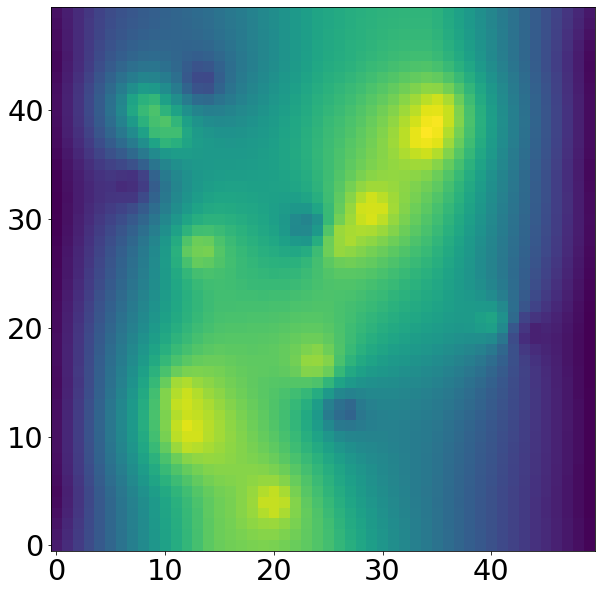

In [57]:
plt.imshow(phi_Multi_cart_linear[:,2].reshape(50,50), origin='lower')

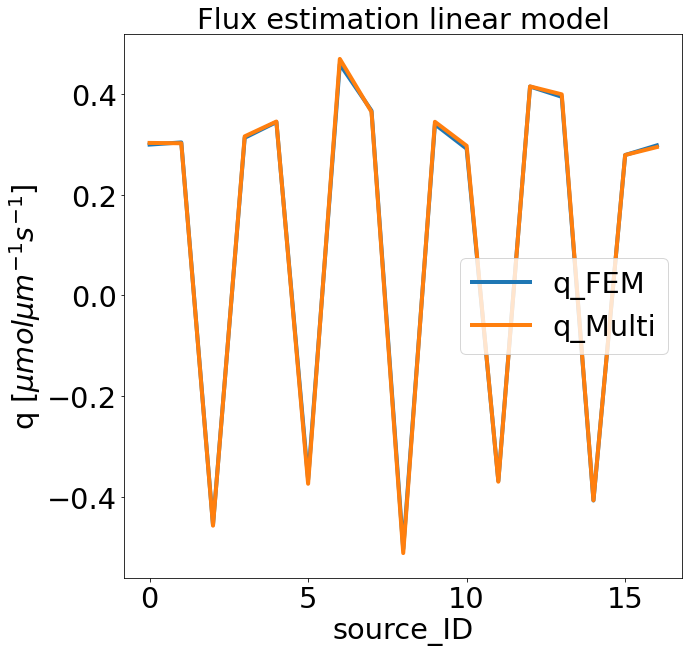

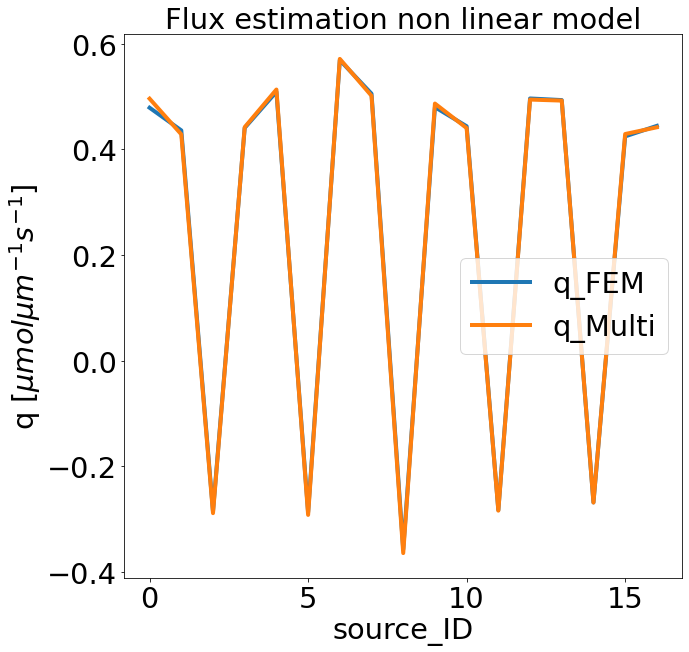

In [58]:
plt.plot(q_FEM_linear, label='q_FEM')
plt.plot(np.array(q_Multi_linear), label='q_Multi')
plt.legend()
plt.xlabel('source_ID')
plt.ylabel('q [$\mu mol \mu m^{-1} s^{-1}$]')
plt.title('Flux estimation linear model')
plt.show()

plt.plot(q_FEM_metab, label='q_FEM')
plt.plot(np.array(q_Multi_metab), label='q_Multi')
plt.legend()
plt.xlabel('source_ID')
plt.ylabel('q [$\mu mol \mu m^{-1} s^{-1}$]')
plt.title('Flux estimation non linear model')
plt.show()


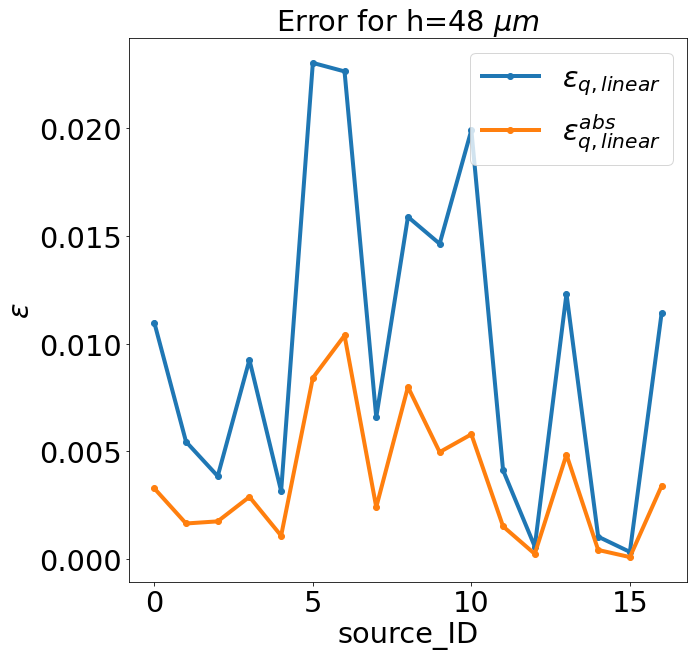

In [59]:
plt.plot(np.abs(np.array(q_Multi_linear)-q_FEM_linear)/np.abs(q_FEM_linear),'-o' ,label='$\\varepsilon_{q,linear}$')
plt.legend()
plt.xlabel('source ID')
plt.ylabel('$\\varepsilon$')

plt.plot(np.abs(np.array(q_Multi_linear)-q_FEM_linear),'-o', label='$\\varepsilon^{abs}_{q,linear}$')
plt.legend()
plt.xlabel('source_ID')
plt.ylabel('$\\varepsilon$')
plt.title('Error for h={} $\mu m$'.format(int(240/cells)))
#plt.savefig(directory_script + '/Figure_latex/errs.eps')
#plt.savefig(directory_article_figures + '/Multiple_source/errs_5cells.eps')
plt.show()


In [60]:
phi_Multi_cart_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_cart_fine_linear.csv')
phi_Multi_FEM_linear=pd.read_csv(Multi_linear_dir + '/phi_Multi_FEM_linear.csv')
phi_Multi_cart_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_cart_fine_metab.csv')
phi_Multi_FEM_metab=pd.read_csv(Multi_metab_dir + '/phi_Multi_FEM_metab.csv')


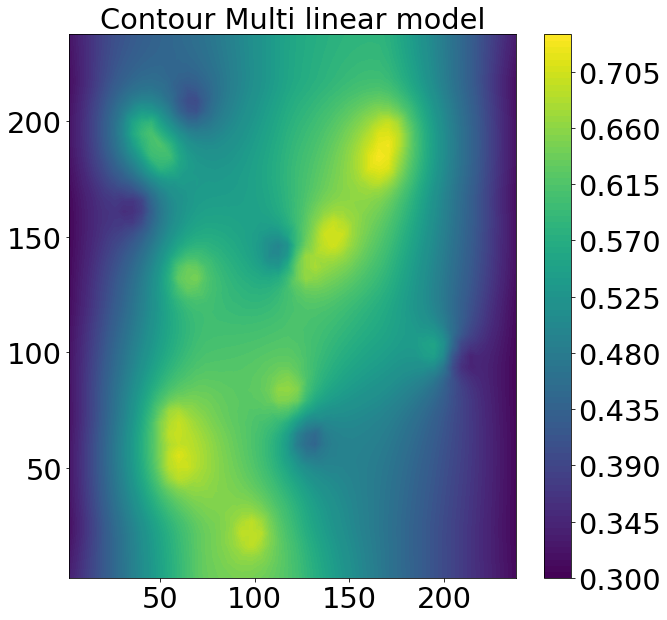

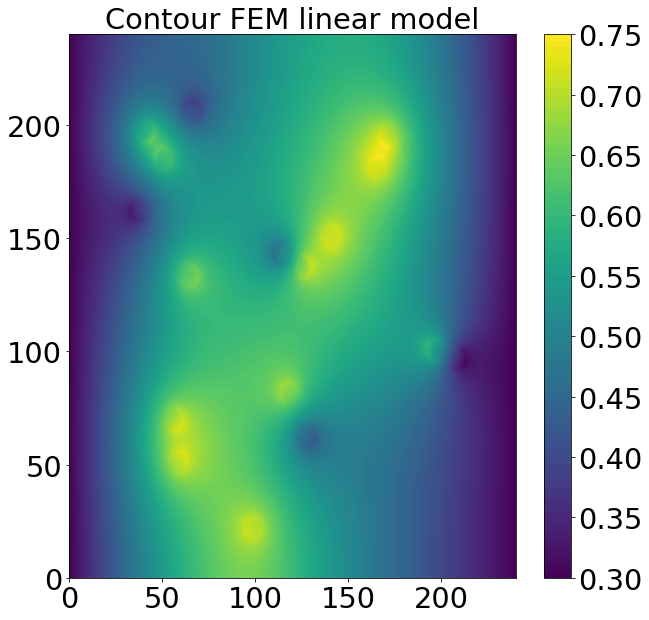

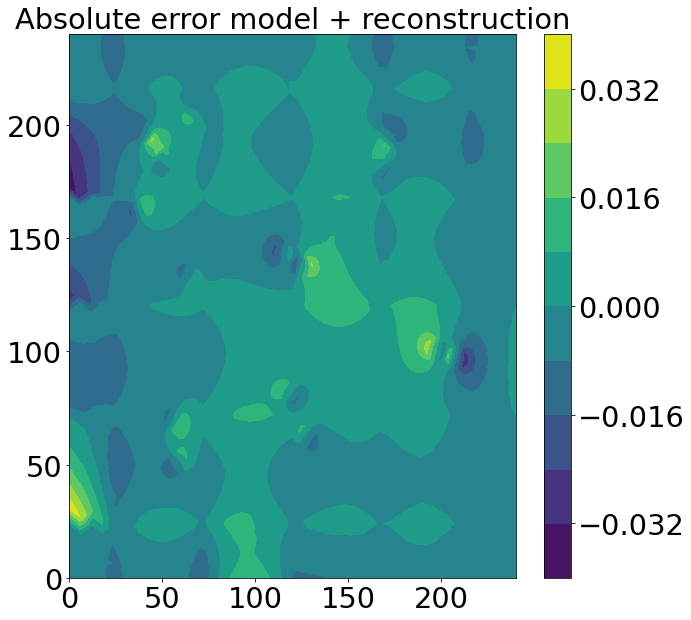

In [61]:

plt.tricontourf(phi_Multi_cart_linear['x'], phi_Multi_cart_linear['y'], phi_Multi_cart_linear['phi'], levels=100)
plt.title('Contour Multi linear model')
plt.colorbar()
#plt.savefig(directory_article_figures + '/Multiple_source/contour.pdf')
plt.show()

plt.tricontourf( FEM_x_linear/1e6, FEM_y_linear/1e6,FEM_phi_linear, levels=100)
plt.title('Contour FEM linear model')
plt.colorbar()
plt.show()

plt.tricontourf( FEM_x_linear/1e6, FEM_y_linear/1e6,FEM_phi_linear-phi_Multi_FEM_linear['phi'], levels=10)
plt.title('Absolute error model + reconstruction')
plt.colorbar()
#plt.savefig(directory_article_figures + '/Multiple_source/abs_err.pdf')
plt.show()



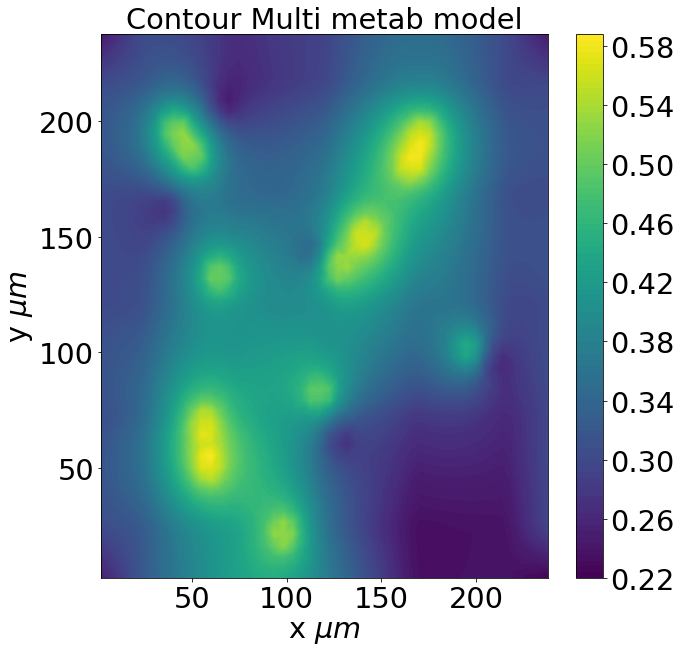

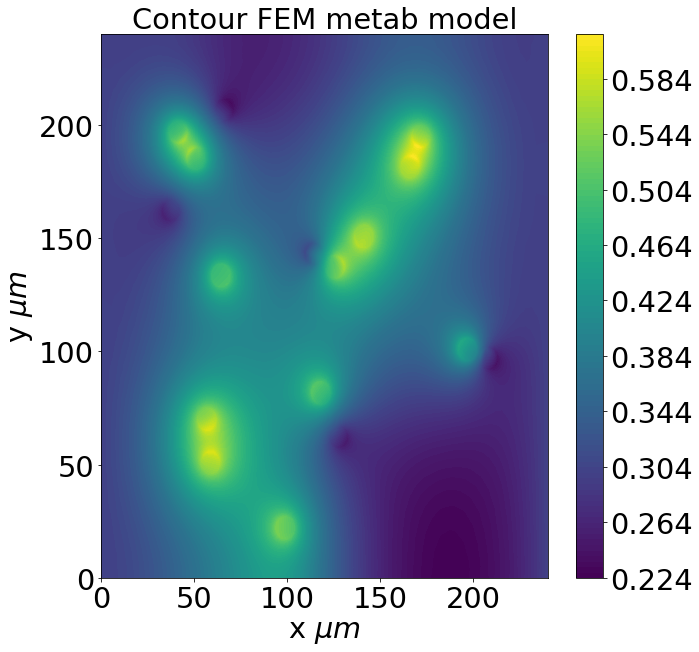

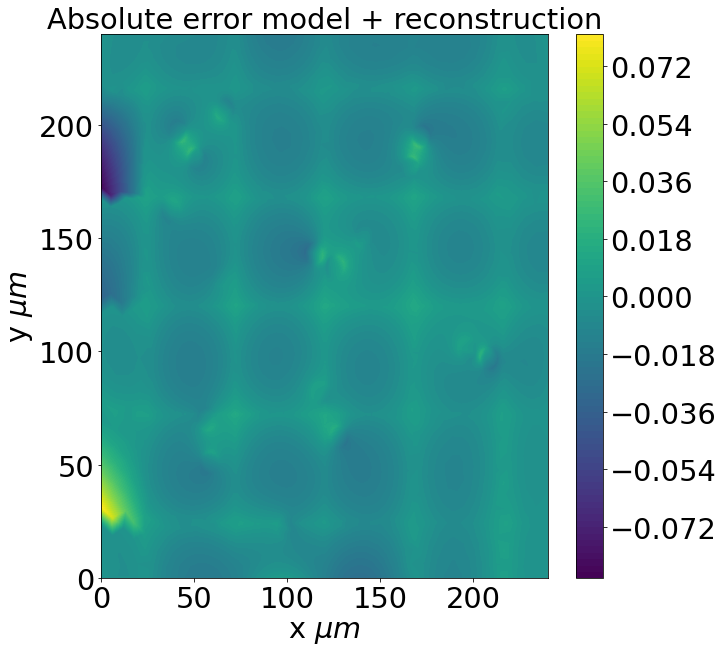

In [62]:
plt.tricontourf(phi_Multi_cart_metab['x'], phi_Multi_cart_metab['y'], phi_Multi_cart_metab['phi'], levels=100)
plt.title('Contour Multi metab model')
plt.xlabel("x $\mu m$")
plt.ylabel("y $\mu m$")
plt.colorbar()
plt.show()

plt.tricontourf( FEM_x_metab/1e6, FEM_y_metab/1e6,FEM_phi_metab, levels=100)
plt.title('Contour FEM metab model')
plt.xlabel("x $\mu m$")
plt.ylabel("y $\mu m$")
plt.colorbar()
plt.show()

plt.tricontourf( FEM_x_metab/1e6, FEM_y_metab/1e6,FEM_phi_metab-phi_Multi_FEM_metab['phi'], levels=100)
plt.title('Absolute error model + reconstruction')
plt.xlabel("x $\mu m$")
plt.ylabel("y $\mu m$")
plt.colorbar()
plt.show()

In [63]:
phi_Multi_cart_linear['x']

0         2.4
1         7.2
2        12.0
3        16.8
4        21.6
        ...  
2495    218.4
2496    223.2
2497    228.0
2498    232.8
2499    237.6
Name: x, Length: 2500, dtype: float64